<a href="https://colab.research.google.com/github/Shruti333/cs50-ai/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import pprint

## Loading Data



In [ ]:
df = pd.read_csv('breast-cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
px.pie(df, 'diagnosis', color_discrete_sequence=['red','green'],title='Data Distribution')


# Feature Selection


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'diagnosis' is the column with categorical values
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [ ]:
corr = df.corr()
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features
relevant_features = cor_target[cor_target>0.25]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')
# Display the result
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


**Assign trainning data and training labels**

In [ ]:
X = df[names].values
y = df['diagnosis'].values.reshape(-1,1)

# Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1000)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9210526315789473

# Another Example - Titanic Dataset

In [ ]:
# Loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
def prepro(data, isTest):
        # Remove useless columns
        data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
        # Filling empty numerical values with median
        data['Age'] = data['Age'].fillna(data['Age'].median())
        data['Fare'] = data['Fare'].fillna(data['Fare'].median())
        # Filling empty embarked with S
        data['Embarked'] = data['Embarked'].fillna('S')
        # Replacing categorical sex with integer values (0 for F and 1 for M)
        data['Sex'] = encoder.fit_transform(data['Sex'])
        # Returning preprocessed data
        return data

In [ ]:
train = prepro(train, True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
test = prepro(test, False)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [ ]:
train = pd.get_dummies(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,False,True
888,0,3,0,28.0,1,2,23.4500,False,False,True
889,1,1,1,26.0,0,0,30.0000,True,False,False


# Constructing ML Model

In [ ]:
x = train.drop(['Survived'], axis=1).values
y = train['Survived'].values

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predict=classifier.predict(x_validation)

In [ ]:
accuracy_score(y_validation,y_predict)

0.7668161434977578

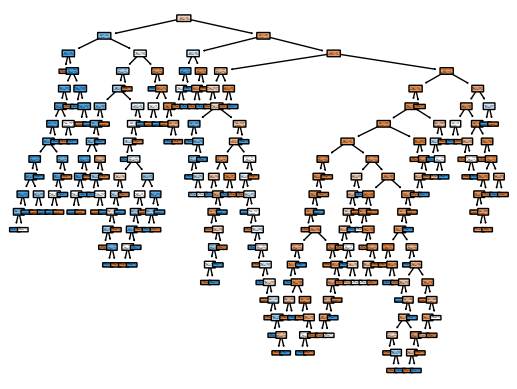

In [ ]:
tree.plot_tree(classifier,filled=True,rounded=True)
plt.show()

# Another Example - Iris Dataset

In [ ]:
data=pd.read_csv('Iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.Species.value_counts()#Target Variable

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
x=data.drop(['Species'],axis=1)
y=data['Species']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1000)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from sklearn import tree
dtc=tree.DecisionTreeClassifier()

In [ ]:
dtc.fit(x,y)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'petal_width <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal_width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal_width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = verginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = verginica'),
 Text(0.38461538461538464, 0.25, 'gini = 0.

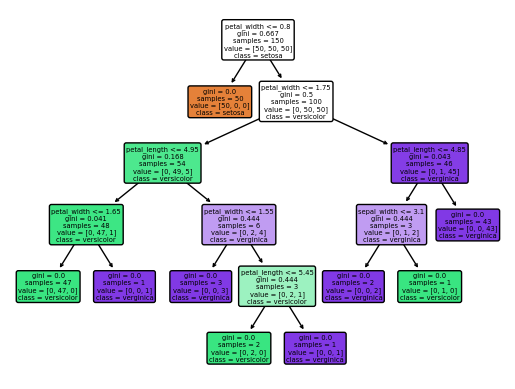

In [ ]:
tree.plot_tree(dtc,class_names=['setosa','versicolor','verginica'],
              feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
              filled=True,
               rounded=True)

# Another Example - HR_Attrition_data

In [ ]:
df=pd.read_csv('HR_Attrition_data.csv',index_col=0)
df.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Age,Status
SLNO,,,,,,,,,,,
1,14,30,-20.79,13.16,42.86,No,No,Female,Agency,34,Joined
2,18,30,50.00,320.00,180.00,No,No,Male,Employee Referral,34,Joined
3,3,45,42.84,42.84,0.00,No,No,Male,Agency,27,Joined
4,26,30,42.84,42.84,0.00,No,No,Male,Employee Referral,34,Joined
5,1,120,42.59,42.59,0.00,No,Yes,Male,Employee Referral,34,Joined


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9011 entries, 1 to 12333
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Duration.to.accept.offer     9011 non-null   int64  
 1   Notice.period                9011 non-null   int64  
 2   Pecent.hike.expected.in.CTC  9011 non-null   float64
 3   Percent.hike.offered.in.CTC  9011 non-null   float64
 4   Percent.difference.CTC       9011 non-null   float64
 5   Joining.Bonus                9011 non-null   object 
 6   Candidate.relocate.actual    9011 non-null   object 
 7   Gender                       9011 non-null   object 
 8   Candidate.Source             9011 non-null   object 
 9   Age                          9011 non-null   int64  
 10  Status                       9011 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 844.8+ KB


In [ ]:
x=df.drop('Status',axis=1)
y=df['Status']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
x_enc=encoder.fit_transform(x)
type(x_enc)

numpy.ndarray

In [ ]:
x_enc_df=pd.DataFrame(x_enc,columns=df.columns[:-1])

In [ ]:
x_enc_df.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Age
0,16.0,1.0,36.0,519.0,1042.0,0.0,0.0,0.0,0.0,14.0
1,20.0,1.0,1380.0,2595.0,1140.0,0.0,0.0,1.0,2.0,14.0
2,5.0,2.0,1220.0,1619.0,678.0,0.0,0.0,1.0,0.0,7.0
3,28.0,1.0,1220.0,1619.0,678.0,0.0,0.0,1.0,2.0,14.0
4,3.0,6.0,1213.0,1612.0,678.0,0.0,1.0,1.0,2.0,14.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_enc_df,y,test_size=0.2,random_state=1000)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7504159733777038

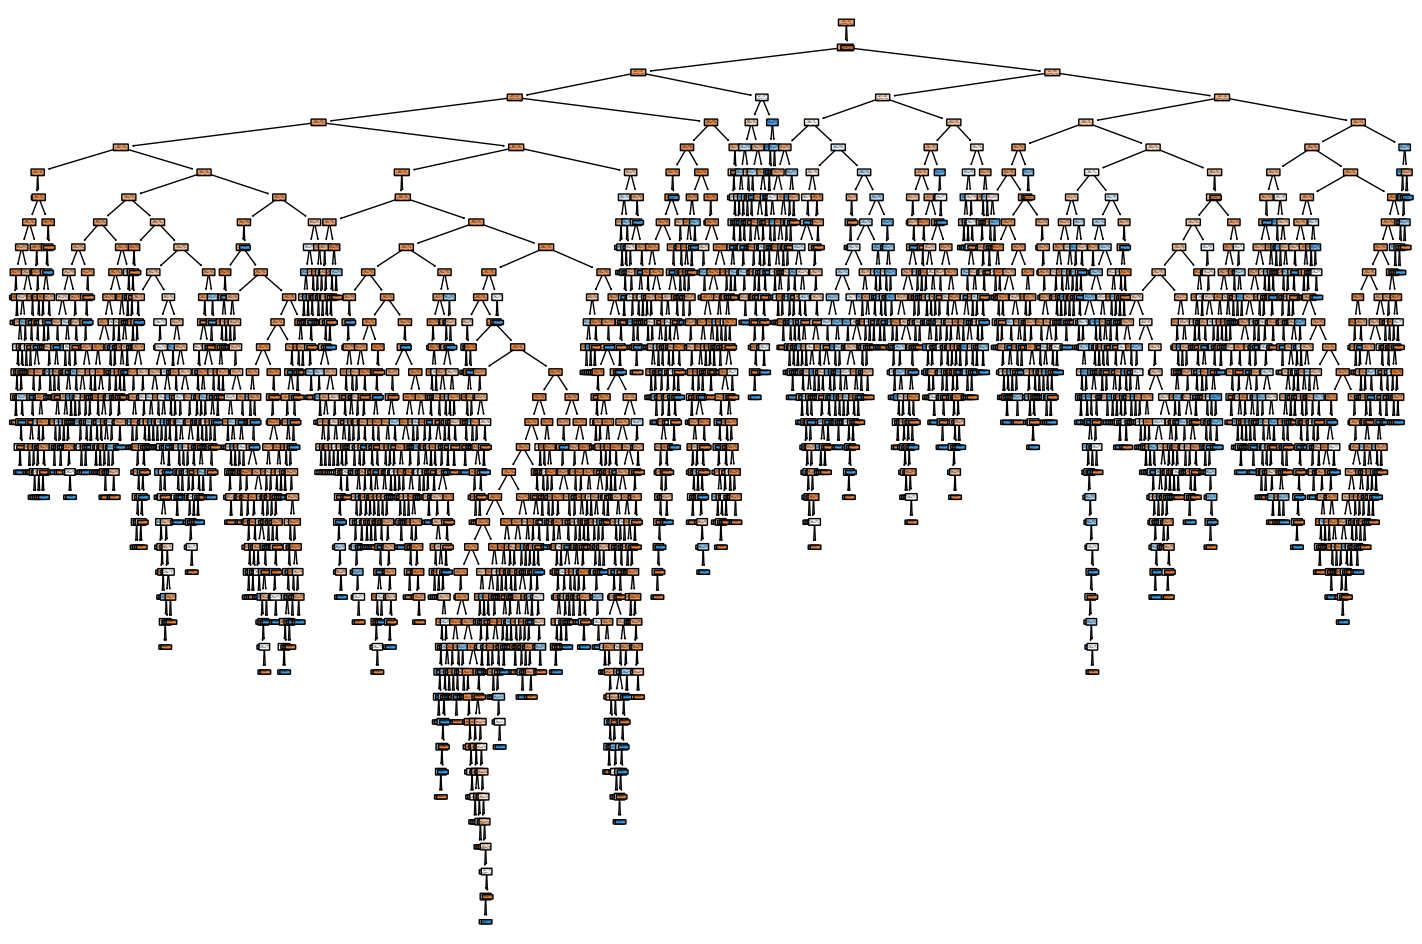

In [ ]:
from sklearn import tree
plt.figure(figsize=(18,12))
dtc=tree.DecisionTreeClassifier(random_state=1)
dtc.fit(x_enc_df,y)
tree.plot_tree(dtc,filled=True,rounded=True)
plt.show()

# K-Means Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(dataset.iloc[:,1].values)
dataset['Gender'] = integer_encoded
dataset.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


C:\Users\SwatiMathur\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SwatiMathur\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SwatiMathur\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SwatiMathur\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

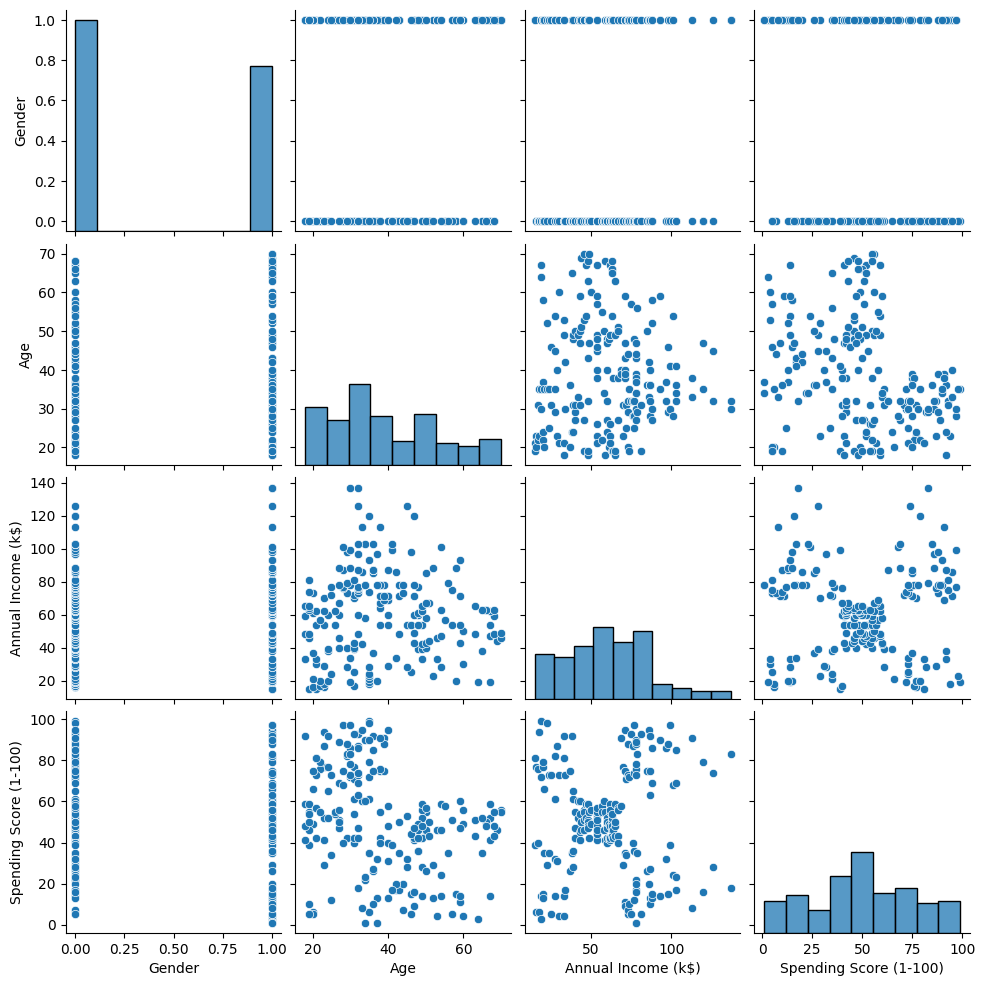

In [ ]:
sns.pairplot(dataset.iloc[:,1:5])

In [ ]:
dataset_1 = dataset.iloc[:,1:5]
dataset_1.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_

Text(0, 0.5, 'score')

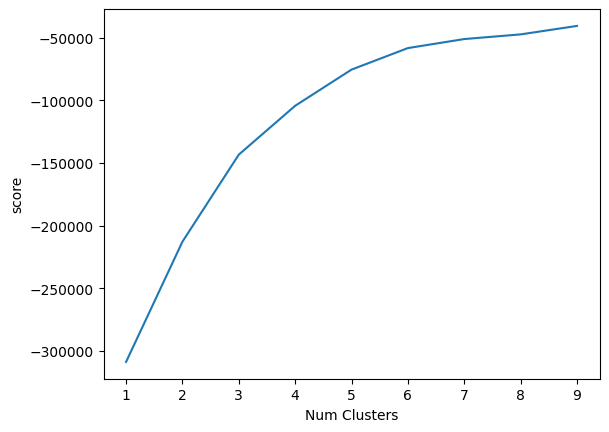

In [ ]:
results = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    res = kmeans.fit(dataset_1)
    results.append(res.score(dataset_1))
plt.plot(range(1,10),results)
plt.xlabel('Num Clusters')
plt.ylabel('score')

### Fitting the Model

In [ ]:
model = KMeans(n_clusters= 3, init='k-means++')
clusters = model.fit_predict(dataset_1)
clusters

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Segmentation 2: Using only Annual Income and Spending Score

In [ ]:
dataset_2 = dataset.iloc[:,3:5]
dataset_2.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_

Text(0, 0.5, 'score')

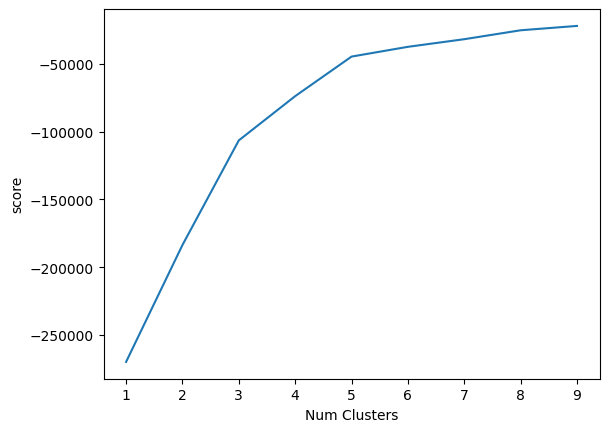

In [ ]:
results = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    res = kmeans.fit(dataset_2)
    results.append(res.score(dataset_2))
plt.plot(range(1,10),results)
plt.xlabel('Num Clusters')
plt.ylabel('score')

In [ ]:
model = KMeans(n_clusters=5, init='k-means++')
clusters = model.fit_predict(dataset_2)
clusters

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

C:\Users\SwatiMathur\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\SwatiMathur\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\SwatiMathur\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



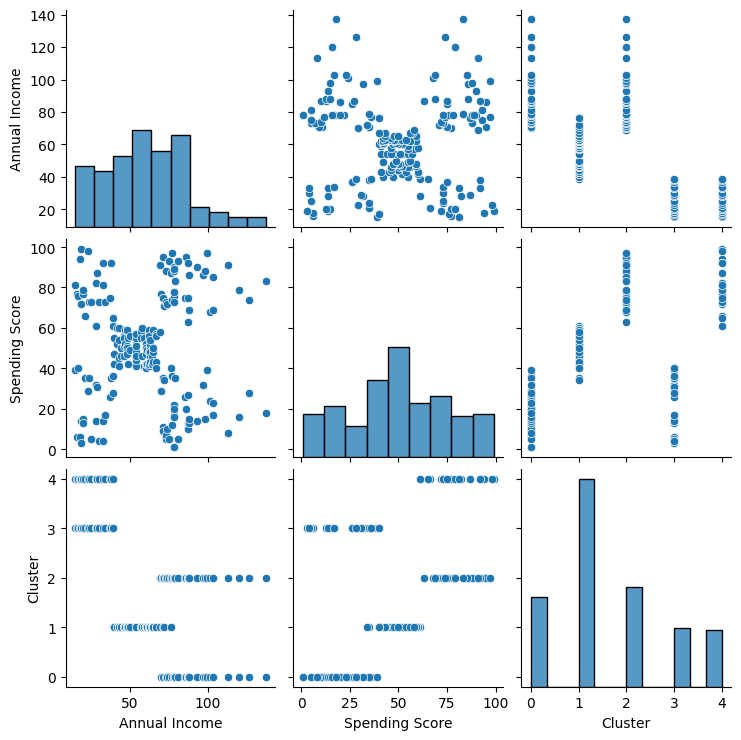

In [ ]:
segments = pd.DataFrame()
segments['Annual Income'] = dataset['Annual Income (k$)']
segments['Spending Score'] = dataset['Spending Score (1-100)']
segments['Cluster'] = clusters
sns.pairplot(segments)

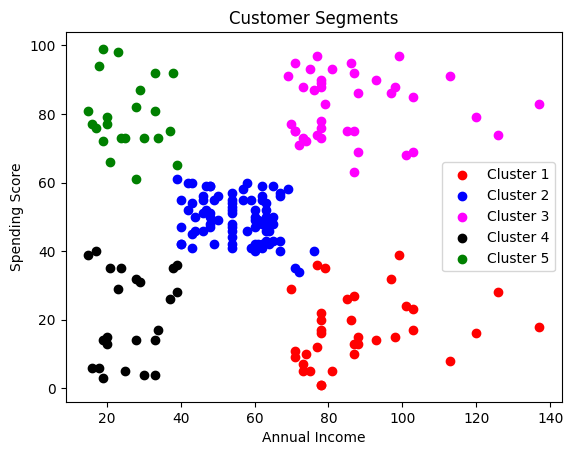

In [ ]:
cluster_1 = segments[clusters==0].iloc[:,0:2]
cluster_2 = segments[clusters==1].iloc[:,0:2]
cluster_3 = segments[clusters==2].iloc[:,0:2]
cluster_4 = segments[clusters==3].iloc[:,0:2]
cluster_5 = segments[clusters==4].iloc[:,0:2]

plt.scatter(cluster_1.iloc[:,0],cluster_1.iloc[:,1],c='red',label='Cluster 1')
plt.scatter(cluster_2.iloc[:,0],cluster_2.iloc[:,1],c='blue',label='Cluster 2')
plt.scatter(cluster_3.iloc[:,0],cluster_3.iloc[:,1],c='magenta',label='Cluster 3')
plt.scatter(cluster_4.iloc[:,0],cluster_4.iloc[:,1],c='black',label='Cluster 4')
plt.scatter(cluster_5.iloc[:,0],cluster_5.iloc[:,1],c='green',label='Cluster 5')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.legend()

## Another Example

In [ ]:
dataset=pd.read_csv('Iris.csv')

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=dataset.iloc[:,[1,2]].values

In [ ]:
x

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

[130.18093333333334,
 57.982406042078765,
 37.12370212765958,
 27.982542817358617,
 20.9719133670096,
 17.23869523809524,
 14.63190960705961,
 12.911711915446569,
 11.178960061443934,
 9.449454365079367]

Text(0, 0.5, 'WCSS/Intertia/Average Dispersion')

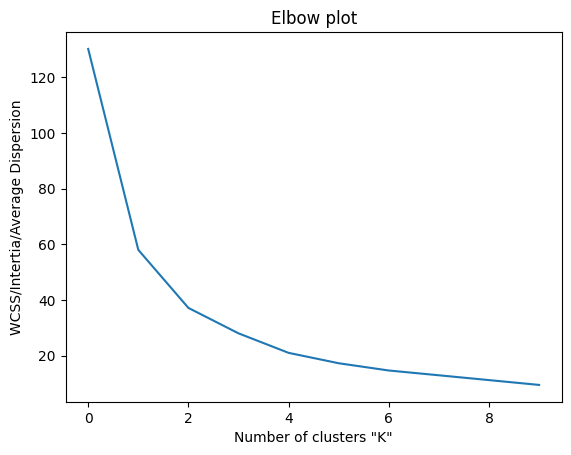

In [ ]:
plt.plot(wcss)
plt.title('Elbow plot')
plt.xlabel('Number of clusters "K"')
plt.ylabel('WCSS/Intertia/Average Dispersion')

In [ ]:
cluster1=KMeans(n_clusters=4,random_state=0)
cluster_labels=cluster1.fit_predict(x)
print(cluster_labels)

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 2 2 3 3 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 3 3 3 2 2 3 3 3 2 2 3
 2 2 3 3 2 2 3 3 2 3 2 3 2 1 1 1 0 1 0 1 2 1 2 2 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 1 0 1 1 2 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


In [ ]:
range_n_clusters=[2,3,4,5,6]
for n in range_n_clusters:
    cluster_ss=KMeans(n_clusters=n,random_state=10)
    cluster_labels=cluster_ss.fit_predict(x)
    silhouette_avg=silhouette_score(x,cluster_labels)
    print("for num_of_cluster=",n,"The average silhouette is ",silhouette_avg)

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 2 The average silhouette is  0.4635854719215507


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 3 The average silhouette is  0.4434693231245126


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 4 The average silhouette is  0.4205596260079767


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 5 The average silhouette is  0.4139998532414019


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 6 The average silhouette is  0.39590545339344324


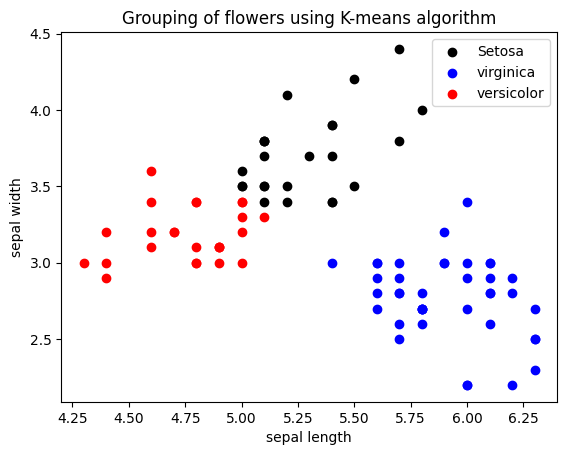

In [ ]:
#Visualization
plt.scatter(x[cluster_labels==0,0],x[cluster_labels==0,1],c="black",label="Setosa")
plt.scatter(x[cluster_labels==1,0],x[cluster_labels==1,1],c="blue",label="virginica")
plt.scatter(x[cluster_labels==2,0],x[cluster_labels==2,1],c="red",label="versicolor")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Grouping of flowers using K-means algorithm')
plt.legend()

### Another example

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
df=pd.read_csv('shopping_data.csv',index_col=0)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
x=df.iloc[:,[2,3]].values
type(x)

numpy.ndarray

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
wcss=[]
for i in range(1,11):#
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124]

Text(0, 0.5, 'WCSS/Intertia/Average Dispersion')

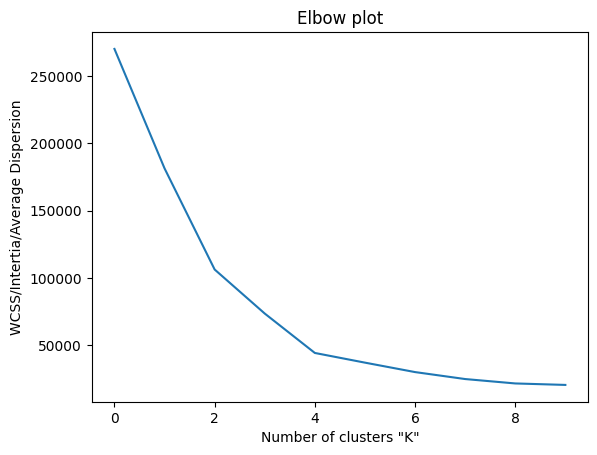

In [ ]:
plt.plot(wcss)
plt.title('Elbow plot')
plt.xlabel('Number of clusters "K"')
plt.ylabel('WCSS/Intertia/Average Dispersion')

In [ ]:
range_n_clusters=[2,3,4,5,6]
for n in range_n_clusters:
    cluster_ss=KMeans(n_clusters=n,random_state=10)
    cluster_labels=cluster_ss.fit_predict(x)
    silhouette_avg=silhouette_score(x,cluster_labels)
    print("for num_of_cluster=",n,"The average silhouette is ",silhouette_avg)

C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 2 The average silhouette is  0.2968969162503008


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 3 The average silhouette is  0.46761358158775435


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 4 The average silhouette is  0.4931963109249047


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 5 The average silhouette is  0.553931997444648


C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SwatiMathur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


for num_of_cluster= 6 The average silhouette is  0.5376203956398481


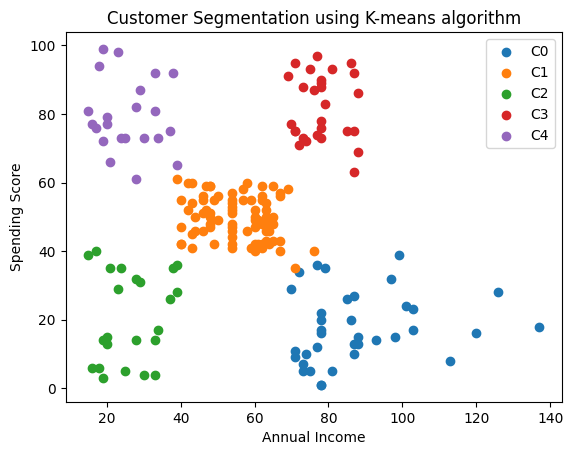

In [ ]:
#Visualization
plt.scatter(x[cluster_labels==0,0],x[cluster_labels==0,1],label="C0")
plt.scatter(x[cluster_labels==1,0],x[cluster_labels==1,1],label="C1")
plt.scatter(x[cluster_labels==2,0],x[cluster_labels==2,1],label="C2")
plt.scatter(x[cluster_labels==3,0],x[cluster_labels==3,1],label="C3")
plt.scatter(x[cluster_labels==4,0],x[cluster_labels==4,1],label="C4")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using K-means algorithm')
plt.legend()